Continuação do jupyter anterior. 

        01-Perceptron-iris.ipynb
        
----------------------------------------------------------------------------------------------------------------


Breve descrição:

O problema que resolveremos com o perceptron envolve a classificação das espécies de íris com base em suas características morfológicas. Especificamente, usaremos o perceptron para distinguir entre duas das três espécies de íris no dataset. 

No jupyter anterior usamos a biblioteca numpy para criar do zero um perceptron. Agora iremos utizar alguns ferramenta mais sofistica que iram faciliar todo o processo. 

* 1 - Aprendendo a criar um classe no numpy 

*  * 1.1 - Como criar um classe perceptron.
*  * 1.2 - treinando o perceptron.

*  2 - Introdução a bilbioteca Pytorch.
*  * 2.1 - Aprendendo a criar um perceptron.
*  * 2.2 - Como treinar um perceptron.
*  * 2.3 - Como Treinar utilizando a GPU.



# 1 - Aprendendo a criar um classe no numpy 

## 1.0 Para quem não sabe oque é classe ou programação orientada a objeto.

Introdução às Classes em Python

Python é uma linguagem de programação orientada a objetos, o que significa que ela suporta o uso de classes para organizar código em componentes reutilizáveis. Uma classe é como um blueprint para criar objetos; um objeto é uma instância de uma classe. Com classes, podemos modelar dados e funcionalidades complexas de maneira intuitiva e acessível.

```python
*Definindo uma Classe*

    Uma classe é definida usando a palavra-chave class, seguida pelo nome da classe e dois pontos. Dentro da classe, definimos funções que são chamadas de métodos. O método `__init__()` é especial: ele é o construtor da classe e é chamado automaticamente quando um novo objeto da classe é criado.


class Carro:
    def __init__(self, marca, modelo, ano):
        self.marca = marca
        self.modelo = modelo
        self.ano = ano

Neste exemplo, Carro é uma classe com um método __init__() que inicializa três atributos: marca, modelo e ano. A palavra self é uma referência à instância atual da classe e é usada para acessar variáveis que pertencem à classe. Para criar uma instância de uma classe, você chama a classe usando o nome da classe seguido por parênteses, passando os argumentos que o método __init__() aceita:

*Criando a instância:*

meu_carro = Carro('Ford', 'Mustang', 2020)

Aqui, meu_carro é um objeto da classe Carro. Podemos adicionar outros métodos à classe para definir comportamentos adicionais:

class Carro:
    def __init__(self, marca, modelo, ano):
        self.marca = marca
        self.modelo = modelo
        self.ano = ano

    def descricao(self):
        return f"{self.ano} {self.marca} {self.modelo}"

    def idade(self, ano_atual):
        return ano_atual - self.ano

Agora, a classe Carro tem dois métodos adicionais: descricao() que retorna uma string descrevendo o carro, e idade(), que calcula a idade do carro.


*Herança:* permite que uma classe herde atributos e métodos de outra classe. Isso é útil para criar subcategorias que compartilham funcionalidades comuns.

class CarroEletrico(Carro):
    def __init__(self, marca, modelo, ano, autonomia):
        super().__init__(marca, modelo, ano)
        self.autonomia = autonomia

    def descricao_bateria(self):
        return f"Este carro tem uma autonomia de {self.autonomia} km após uma carga completa."


A classe 'CarroEletrico' herda de 'Carro' e adiciona um novo atributo autonomia, além de um novo método para descrever a bateria. Note que nesse caso temos 'super().__init__( .... )' este comando nos permite utilizar os metodos definido na class Carro().

## 1.1 - Como criar um classe perceptron.

In [1]:
# Importação das bibliotecas necessárias
import numpy as np  # Biblioteca para operações numéricas em arrays e matrizes
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos e visualizações

from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
class Perceptron:
    def __init__(self,Entrada):
        self.input = Entrada

        # Inicialização dos pesos e bias
        self.weights = np.random.randn(Entrada.shape[1])
        self.bias = np.random.randn(1)

    def pegar_pesos_bias(self):
        return self.weights,self.bias


Criamos um classe chamada perceptron que criar os pesos e bias. Também definimos um metodo que devolve quais são os pesos e bias.

In [3]:
#x = np.array( [[0,1,2,3]])
x = np.ones((10,4))
neuronio = Perceptron(x)
neuronio

In [4]:
neuronio.pegar_pesos_bias()

(array([-1.2292747 ,  1.03794655,  0.00986323,  0.11685605]),
 array([0.36205524]))

No jupyter anterior, nos aprendendo que o perceptron tem varias outras funções.

Iremos implementar as outras partes como metodos dentro da clalsse perceptron

In [5]:
class Perceptron:
    def __init__(self, Entrada):
        """
        Inicializa o perceptron com entradas, pesos aleatórios e bias.
        """
        self.weights = np.random.randn(Entrada.shape[1])  # pesos inicializados aleatoriamente
        self.bias = np.random.randn(1)  # bias inicializado aleatoriamente

    def pegar_pesos_bias(self):
        """
        Retorna os pesos e bias do perceptron.
        """
        return self.weights, self.bias
    
    def sigmoid(self, z_):
        """
        Função de Ativação Sigmóide.
        """
        return 1 / (1 + np.exp(-z_))
    
    def forward(self,x_):
        """
        Realiza a propagação direta (forward pass) através de um perceptron simples.
        """
        # Aplicação da função sigmoid para obter a probabilidade. 
        return self.sigmoid(np.dot(x_, self.weights) + self.bias ) 
        
    def derivada_sigmoid(self, s_):
        """
        Derivada da Função Sigmóide.
        """
        return s_ * (1 - s_)
    

    def derivada_erro_quadratico_medio(self,y_pred, y_true):
        """
        Derivada do Erro Quadrático Médio.

        """
        return 2 * (y_pred - y_true) / y_true.size
    
    def backpropagation(self,x_,y_ ,y_pred, learning_rate):
        """
        Algoritmo de Backpropagation.

        """
        # Derivada do erro
        d_error = self.derivada_erro_quadratico_medio(y_pred, y_)
        
        # Derivadas da função de ativação
        d_sigmoid = self.derivada_sigmoid(y_pred)
        
        # Gradientes
        d_weights = np.dot(x_.T, d_error * d_sigmoid)
        #d_weights = np.dot(x_, (d_error * d_sigmoid))  # Remove a transposta se x_ já estiver no formato correto
        d_bias = np.sum(d_error * d_sigmoid)
  
        # Atualização dos pesos e bias
        self.weights -= learning_rate * d_weights
        self.bias -= learning_rate * d_bias

def erro_quadratico_medio(y_pred, y_true):
    """
    Calcula o Erro Quadrático Médio (Mean Squared Error, MSE).
    """
    return np.mean((y_pred - y_true) ** 2)

def plot_decision_boundary(X, y, model_weights, model_bias, indice_f1=0, indice_f2=1):
    """
    Plota o limite de decisão para um modelo de classificação binária junto com os dados de entrada.
    
    """
    # Definir os limites do gráfico
    x_min, x_max = X[:, indice_f1].min() - 0.5, X[:, indice_f1].max() + 0.5
    y_min, y_max = X[:, indice_f2].min() - 0.5, X[:, indice_f2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predizer para cada ponto no meshgrid
    Z = neuronio.sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], model_weights) + model_bias)
    Z = Z.reshape(xx.shape)
    
    # Contorno e preenchimento
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.coolwarm)
    plt.colorbar()

    # Plotar os pontos de dados
    plt.scatter(X[:, indice_f1], X[:, indice_f2], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel(f'{iris.feature_names[indice_f1]}')
    plt.ylabel(f'{iris.feature_names[indice_f2]}')

In [6]:
# Carregar o dataset Iris
iris = datasets.load_iris() 
X = iris.data 
y = iris.target 

# Filtrar para obter apenas as classes 0 e 2
indices = np.where((y == 0) | (y == 2))  # Localiza índices das classes 0 e 2
X = X[indices] 
y = y[indices] 

y = np.where(y == 2, 1, 0)  # Re-codificar classe 2 como 1, classe 0 permanece 0

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalização dos dados para melhor desempenho do modelo
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test) 


# Instanciando a classe Perceptron
neuronio = Perceptron(Entrada=X_train)
neuronio

In [7]:
neuronio.pegar_pesos_bias() # Pesos criados

(array([ 0.80121439,  0.02978505, -1.13445689, -0.10989237]),
 array([0.00567398]))

In [8]:
y_pred = neuronio.forward(X_train) 
y_pred

array([0.43600991, 0.36153677, 0.62885224, 0.55099622, 0.33226863,
       0.77358945, 0.66994441, 0.38289446, 0.62554108, 0.44241844,
       0.59545526, 0.5782026 , 0.51758227, 0.69495555, 0.36629969,
       0.69811763, 0.3695162 , 0.36491181, 0.67966347, 0.74149847,
       0.65738754, 0.62274646, 0.64679417, 0.43346362, 0.68496711,
       0.66906919, 0.54149398, 0.6277291 , 0.41989737, 0.55668618,
       0.55601338, 0.56325554, 0.67619878, 0.54745156, 0.53229625,
       0.32728657, 0.57878893, 0.27276897, 0.7560679 , 0.45514549,
       0.20815485, 0.30734838, 0.32223699, 0.62495391, 0.26307607,
       0.45423071, 0.65971753, 0.40392929, 0.36766427, 0.40214088,
       0.47599835, 0.5524647 , 0.36190749, 0.70542986, 0.31903634,
       0.42212341, 0.44687641, 0.69668448, 0.36833655, 0.42021033,
       0.27232322, 0.28941079, 0.64629296, 0.57198818, 0.63365256,
       0.42756835, 0.6648329 , 0.61100377, 0.63103232, 0.35219309,
       0.48946119, 0.37949126, 0.31097854, 0.32466912, 0.69558

In [9]:
neuronio.backpropagation(X_train, y_train, y_pred, learning_rate=0.01)
neuronio.pegar_pesos_bias()# Novos pesos e bias.

(array([ 0.80355902,  0.02833416, -1.13167248, -0.10711821]),
 array([0.00580081]))

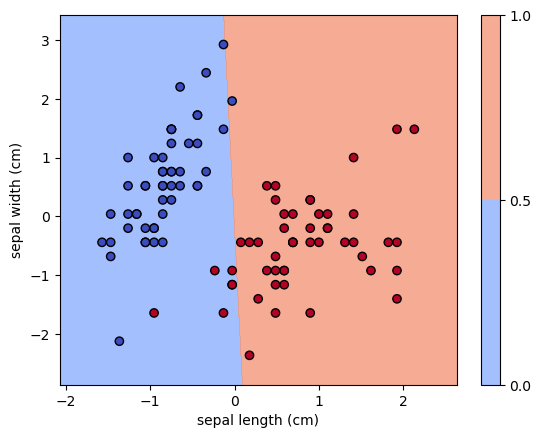

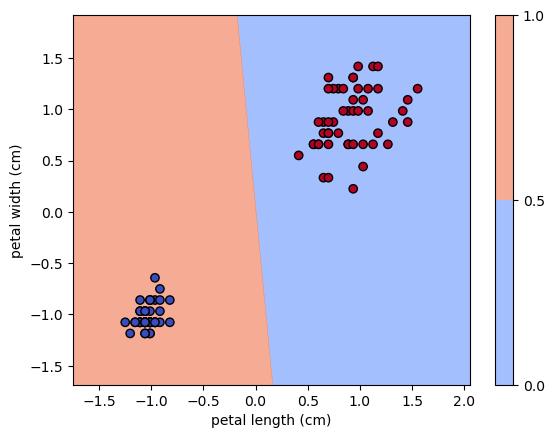

In [10]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Dados do modelo (hipotético)
weights = neuronio.pegar_pesos_bias()# Novos pesos e bias.

model_weights = np.array([ weights[0][0],  weights[0][1]])  
model_bias = weights[-1]                  
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[0][2],  weights[0][3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()

## 1.2 - treinando o perceptron.

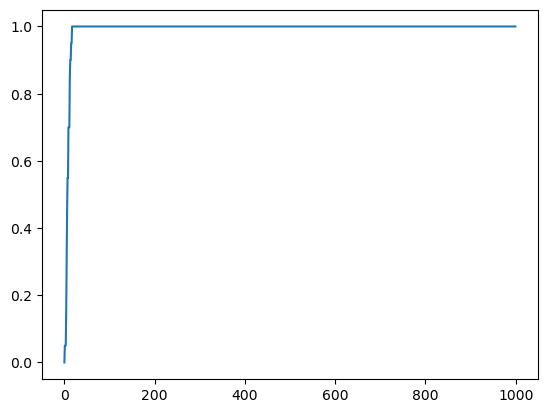

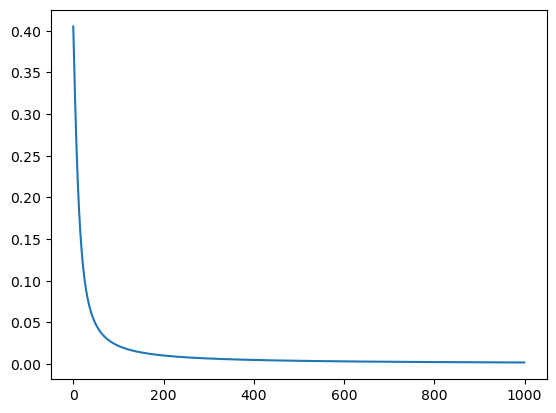

In [11]:

Loss_acuracia = []
Loss_mse = []

# Treinamento do modelo
for _ in range(1000):
    y_pred = neuronio.forward(X_train)
    neuronio.backpropagation(X_train, y_train, y_pred, learning_rate=0.1)
    mse  = erro_quadratico_medio(y_train, y_pred)
    
    y_pred_test = [1 if neuronio.forward(i) > 0.5 else 0 for i in X_test]

    accuracy = accuracy_score(y_test, y_pred_test)
    Loss_acuracia.append(accuracy)
    Loss_mse.append(mse)

# Avaliação
plt.plot(Loss_acuracia);plt.show()
plt.plot(Loss_mse)
plt.show()

In [12]:
weights = neuronio.pegar_pesos_bias()# Novos pesos e bias.
weights

(array([ 1.65308057, -0.9525464 ,  0.42114552,  1.50387705]),
 array([0.33162356]))

In [13]:
weights[0]

array([ 1.65308057, -0.9525464 ,  0.42114552,  1.50387705])

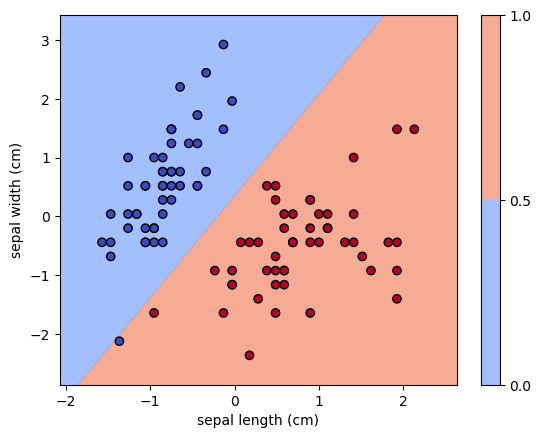

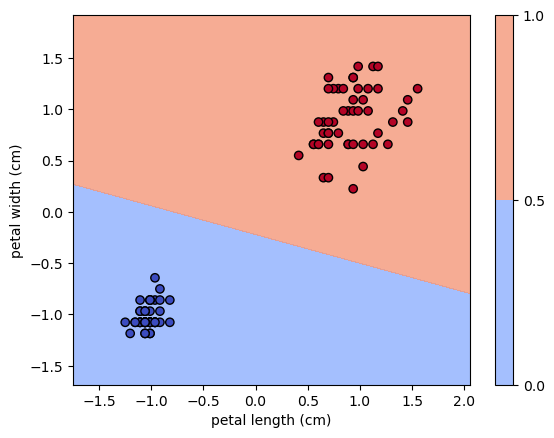

In [14]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Dados do modelo (hipotético)
weights = neuronio.pegar_pesos_bias()# Novos pesos e bias.

model_weights = np.array([ weights[0][0],  weights[0][1]])  
model_bias = weights[-1]                  
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[0][2],  weights[0][3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()

# 2 - Introdução a bilbioteca Pytorch.

## 2.1 - Aprendendo a criar um perceptron.

## 2.2 - Como treinar um perceptron.

## 2.3 - Como Treinar utilizando a GPU.

In [ ]:
# Importação das bibliotecas necessárias
import numpy as np  # Biblioteca para operações numéricas em arrays e matrizes
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos e visualizações
from sklearn import datasets  # Módulo para carregar conjuntos de dados pré-definidos
from sklearn.model_selection import train_test_split  # Função para dividir dados em treino e teste
from sklearn.preprocessing import StandardScaler  # Ferramenta para normalização dos dados
from sklearn.metrics import accuracy_score  # Função para calcular a acurácia de modelos

#### Alguns resultados com inicialização aleatória e sem treinamento

In [ ]:
# Carregar o dataset Iris
iris = datasets.load_iris()  # Carrega o dataset Iris do sklearn
X = iris.data  # Matriz de características/features do dataset
y = iris.target  # Vetor de rótulos/targets correspondente

# Filtrar para obter apenas as classes 0 e 2
indices = np.where((y == 0) | (y == 2))  # Localiza índices das classes 0 e 2
X = X[indices]  # Filtra X para incluir apenas as amostras das classes 0 e 2
y = y[indices]  # Filtra y da mesma forma

# Como o dataset original codifica Iris Setosa como 0 e Iris Virginica como 2,
# você pode querer re-codificar os rótulos para simplificar (opcional):
y = np.where(y == 2, 1, 0)  # Re-codificar classe 2 como 1, classe 0 permanece 0
# Isso simplifica o problema para uma classificação binária entre as classes 0 e 1.

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 significa que 20% dos dados serão usados para teste, o resto para treinamento.
# random_state=42 garante reprodutibilidade, usando sempre a mesma divisão.

# Normalização dos dados para melhor desempenho do modelo
scaler = StandardScaler()  # Inicializa o objeto StandardScaler
X_train = scaler.fit_transform(X_train)  # Calcula média e desvio padrão e transforma os dados de treinamento
X_test = scaler.transform(X_test)  # Aplica a mesma transformação nos dados de teste


In [ ]:
# Plot dos dados de treino
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Classe 1')

# Plot dos dados de teste
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='lightcoral', label='Classe 0 Teste', edgecolor='k')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='lightblue', label='Classe 1 Teste', edgecolor='k')

plt.xlabel(f'{iris.feature_names[0]}')
plt.ylabel(f'{iris.feature_names[1]}')
plt.title('Visualização dos Dados Iris (2 Classes)')
plt.legend()
plt.show()

# Plot dos dados de treino
plt.scatter(X_train[y_train == 0][:, 2], X_train[y_train == 0][:, 3], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 2], X_train[y_train == 1][:, 3], color='blue', label='Classe 1')

# Plot dos dados de teste
plt.scatter(X_test[y_test == 0][:, 2], X_test[y_test == 0][:, 3], color='lightcoral', label='Classe 0 Teste', edgecolor='k')
plt.scatter(X_test[y_test == 1][:, 2], X_test[y_test == 1][:, 3], color='lightblue', label='Classe 1 Teste', edgecolor='k')

plt.xlabel(f'{iris.feature_names[2]}')
plt.ylabel(f'{iris.feature_names[3]}')
plt.title('Visualização dos Dados Iris (2 Classes)')
plt.legend()
plt.show()


Vamos gerar os pesos e bias para ilustra como fica o modelo sem treinamento

In [ ]:
#Para sempre gerar os mesmo numero aleatorios
np.random.seed(10)
# Inicialização dos pesos e bias
weights = np.random.randn(X_train.shape[1])
bias = np.random.randn()
print(" Valores do pesos:",weights,"\n Valores do bias:",bias)

Vamos definir um funçao para visualaizar os dados e com os pesos gerados inicialmente classificam os dados

In [ ]:
def sigmoid(z):
    """
    Função de Ativação Sigmóide.

    """
    return 1 / (1 + np.exp(-z))

def derivada_sigmoid(z):
    """
    Derivada da Função Sigmóide.

    """
    s = sigmoid(z)
    return s * (1 - s)

def derivada_erro_quadratico_medio(y_pred, y_true):
    """
    Derivada do Erro Quadrático Médio.
    
    :param y_pred: Vetor de predições do modelo.
    :param y_true: Vetor de valores verdadeiros.
    :return: Vetor de derivadas do erro quadrático médio.
    """
    return 2 * (y_pred - y_true) / y_true.size

def plot_decision_boundary(X, y, model_weights, model_bias, indice_f1=0, indice_f2=1):
    """
    Plota o limite de decisão para um modelo de classificação binária junto com os dados de entrada.
    
    :param X: Matriz de características dos dados de entrada.
    :param y: Vetor de rótulos verdadeiros (classes).
    :param model_weights: Vetor de pesos do modelo de classificação.
    :param model_bias: Bias do modelo de classificação.
    :param indice_f1: Índice da primeira característica a ser usada no plot (padrão é 0).
    :param indice_f2: Índice da segunda característica a ser usada no plot (padrão é 1).
    """
    # Definir os limites do gráfico
    x_min, x_max = X[:, indice_f1].min() - 0.5, X[:, indice_f1].max() + 0.5
    y_min, y_max = X[:, indice_f2].min() - 0.5, X[:, indice_f2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predizer para cada ponto no meshgrid
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], model_weights) + model_bias)
    Z = Z.reshape(xx.shape)
    
    # Contorno e preenchimento
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.coolwarm)
    plt.colorbar()

    # Plotar os pontos de dados
    plt.scatter(X[:, indice_f1], X[:, indice_f2], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel(f'{iris.feature_names[indice_f1]}')
    plt.ylabel(f'{iris.feature_names[indice_f2]}')
    plt.title('Decision Boundary and Data Points')


In [ ]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Dados do modelo (hipotético)
model_weights = np.array([ weights[0],  weights[1]])  # Substitua por seus pesos reais
model_bias = bias                   # Substitua pelo seu viés real
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[2],  weights[3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()

#### Definindo funções de treinamento (backpropagation)

In [ ]:
def erro_quadratico_medio(y_pred, y_true):
    """
    Calcula o Erro Quadrático Médio (Mean Squared Error, MSE).
    """
    return np.mean((y_pred - y_true) ** 2)

def forward(X, weights, bias):
    """
    Realiza a propagação direta (forward pass) através de um perceptron simples.
    """
    z = np.dot(X, weights) + bias  # Combinação linear das entradas com os pesos e o bias
    return sigmoid(z)  # Aplicação da função sigmoid para obter a probabilidade

def backpropagation(X, y, y_pred, weights, bias, learning_rate):
    """
    Algoritmo de Backpropagation.
    
    :param X: Matriz de características dos dados de entrada.
    :param y: Vetor de rótulos verdadeiros.
    :param y_pred: Vetor de predições do modelo.
    :param weights: Vetor de pesos atual do modelo.
    :param bias: Bias atual do modelo.
    :param learning_rate: Taxa de aprendizado, controla o tamanho do passo na atualização.
    :return: Tupla contendo os pesos e bias atualizados.
    """
    # Derivada do erro
    error = y_pred - y
    d_error = derivada_erro_quadratico_medio(y_pred, y)
    
    # Derivadas da função de ativação
    z = np.dot(X, weights) + bias
    d_sigmoid = derivada_sigmoid(z)
    
    # Gradientes
    d_weights = np.dot(X.T, d_error * d_sigmoid)
    d_bias = np.sum(d_error * d_sigmoid)
    
    # Atualização dos pesos e bias
    weights -= learning_rate * d_weights
    bias -= learning_rate * d_bias

    return weights, bias

Vamos iniciar o treinamento

In [ ]:
Loss_acuracia = []
Loss_mse = []

# Treinamento do modelo
for _ in range(50):
    for x, y in zip(X_train, y_train):
        y_pred = forward(x, weights, bias)
        weights, bias = backpropagation(x, y, y_pred, weights, bias, learning_rate=0.01)

    y_pred_test = [forward(x, weights, bias) > 0.5 for x in X_test]
    accuracy = accuracy_score(y_test, y_pred_test)
    mse  = erro_quadratico_medio(y_test, y_pred_test)

    Loss_acuracia.append(accuracy)
    Loss_mse.append(mse)

# Avaliação
plt.plot(Loss_acuracia);plt.show()
plt.plot(Loss_mse)
plt.show()

Vamos visualizar o resultados dos parametros treinados

In [ ]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Dados do modelo (hipotético)
model_weights = np.array([ weights[0],  weights[1]])  # Substitua por seus pesos reais
model_bias = bias                   # Substitua pelo seu viés real
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[2],  weights[3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()